### Examples: generating PSF of single-objective lightsheet fluorescence microscopy 
Created by Yuechuan Lin
12/01/2025 

In [22]:
import tifffile
import sys 
import os
current_path = os.path.dirname(os.getcwd()) 
print(f"current path is {current_path}")
sys.path.insert(1, current_path)

from utilities.utils import cross_section_3dpsf_2dfit, cross_section_3d_1dfit
from utilities.psf import psfSOLS
from utilities import misc 
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

current path is /Users/chunyanwu/MIT Dropbox/Yuechuan Lin/A-github/lightsheetTools


In [19]:
mysetup = psfSOLS(n2=1.0, na2=0.8, n3=1.525, na3=1.0,alpha=45, size=1024, zsize=80,zern_mode=0, zern_coeff=0.3,binning=1)




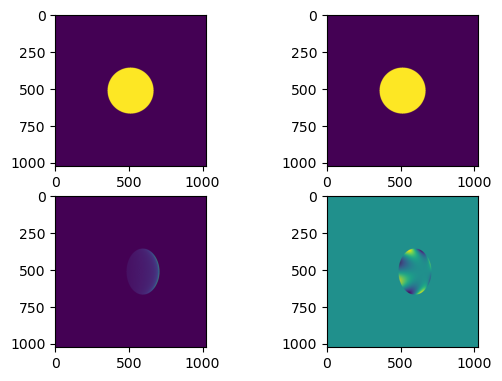

In [20]:
fig, ax = misc.create_fig(figsize=(6,4),nrows=2,ncols=2)
o2_phase = mysetup._calculate_o2_phase() 
o2_mag = mysetup._calculate_o2_mag()
o3_phase = mysetup._calculate_o3_phase() 
o3_mag = mysetup._calculate_o3_mag()
ax[0,0].imshow(o2_mag) 
ax[0,1].imshow(o2_phase) 

ax[1,0].imshow(o3_mag) 
ax[1,1].imshow(o3_phase)

(80, 1024, 1024)


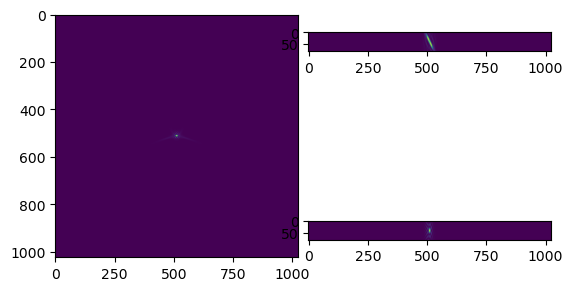

In [21]:
print(mysetup.psf3d.shape) #binning by 4 
ax20 = plt.subplot2grid((8, 8), (0, 0), colspan=4,rowspan=8)
ax21 = plt.subplot2grid((8, 8), (0, 4), colspan=4,rowspan=4)
ax22 = plt.subplot2grid((8, 8), (4, 4), colspan=4,rowspan=4)
ax20.imshow(mysetup.psf3d[40,:,:]) 
ax21.imshow(mysetup.psf3d[:,512,:]) 
ax22.imshow(mysetup.psf3d[:,:,512]) 


In [23]:
psf3d = mysetup.psf3d
psf3d = (psf3d/np.amax(psf3d))
tifffile.imwrite(os.path.join(current_path+'/examples',"sim_psf3d.tif"),psf3d)